In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('cleaned_pattuvam_data.xlsx')
df

,DATE,TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN M,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,YEAR,MONTH,MONTH-YEAR,HOUR,Remark Category,DATETIME
0,2021-12-01,01:00:00,3.51043,0.00284,2.77743,3.39739,No Remarks,2021,12,12-2021,1,No Remarks,2021-12-01 01:00:00
1,2021-12-01,02:00:00,3.49087,0.00312,2.79467,3.37846,No Remarks,2021,12,12-2021,2,No Remarks,2021-12-01 02:00:00
2,2021-12-01,03:00:00,3.50543,0.00344,2.79543,3.39256,No Remarks,2021,12,12-2021,3,No Remarks,2021-12-01 03:00:00
3,2021-12-01,04:00:00,3.51556,0.00372,2.79826,3.40236,No Remarks,2021,12,12-2021,4,No Remarks,2021-12-01 04:00:00
4,2021-12-01,05:00:00,3.50732,0.00401,2.80887,3.39438,No Remarks,2021,12,12-2021,5,No Remarks,2021-12-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21164,2024-04-30,20:00:00,3.50897,0.00331,3.83434,3.39598,No Remarks,2024,4,04-2024,20,No Remarks,2024-04-30 20:00:00
21165,2024-04-30,21:00:00,3.57417,0.00311,3.85220,3.45908,No Remarks,2024,4,04-2024,21,No Remarks,2024-04-30 21:00:00
21166,2024-04-30,22:00:00,3.56158,0.00294,3.80625,3.44690,No Remarks,2024,4,04-2024,22,No Remarks,2024-04-30 22:00:00
21167,2024-04-30,23:00:00,3.50164,0.00279,3.79961,3.38889,No Remarks,2024,4,04-2024,23,No Remarks,2024-04-30 23:00:00


In [3]:
df.isna().sum()

DATE                              0
TIME                              0
RAW WATER FLOW IN ML              0
CLEAR WATER SUMP LEVEL IN M       0
CLEAR WATER PUMPING FLOW ML       0
TREATED WATER PRODUCTION IN ML    0
REMARKS                           0
YEAR                              0
MONTH                             0
MONTH-YEAR                        0
HOUR                              0
Remark Category                   0
DATETIME                          0
dtype: int64

# Yearwise hourly,weekly,monthly and seasonal water flow

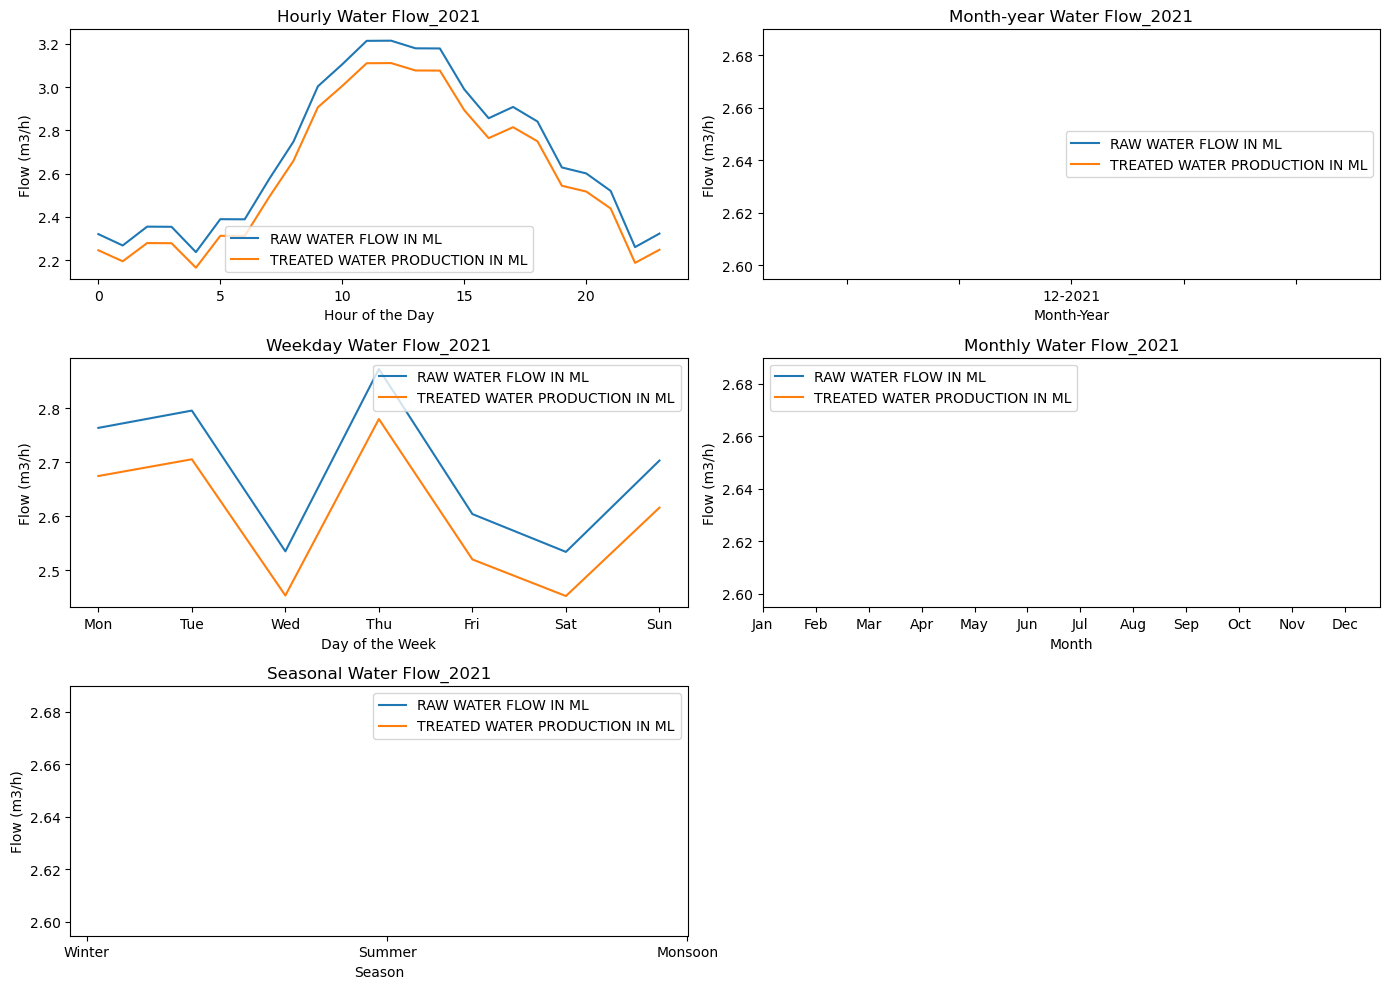

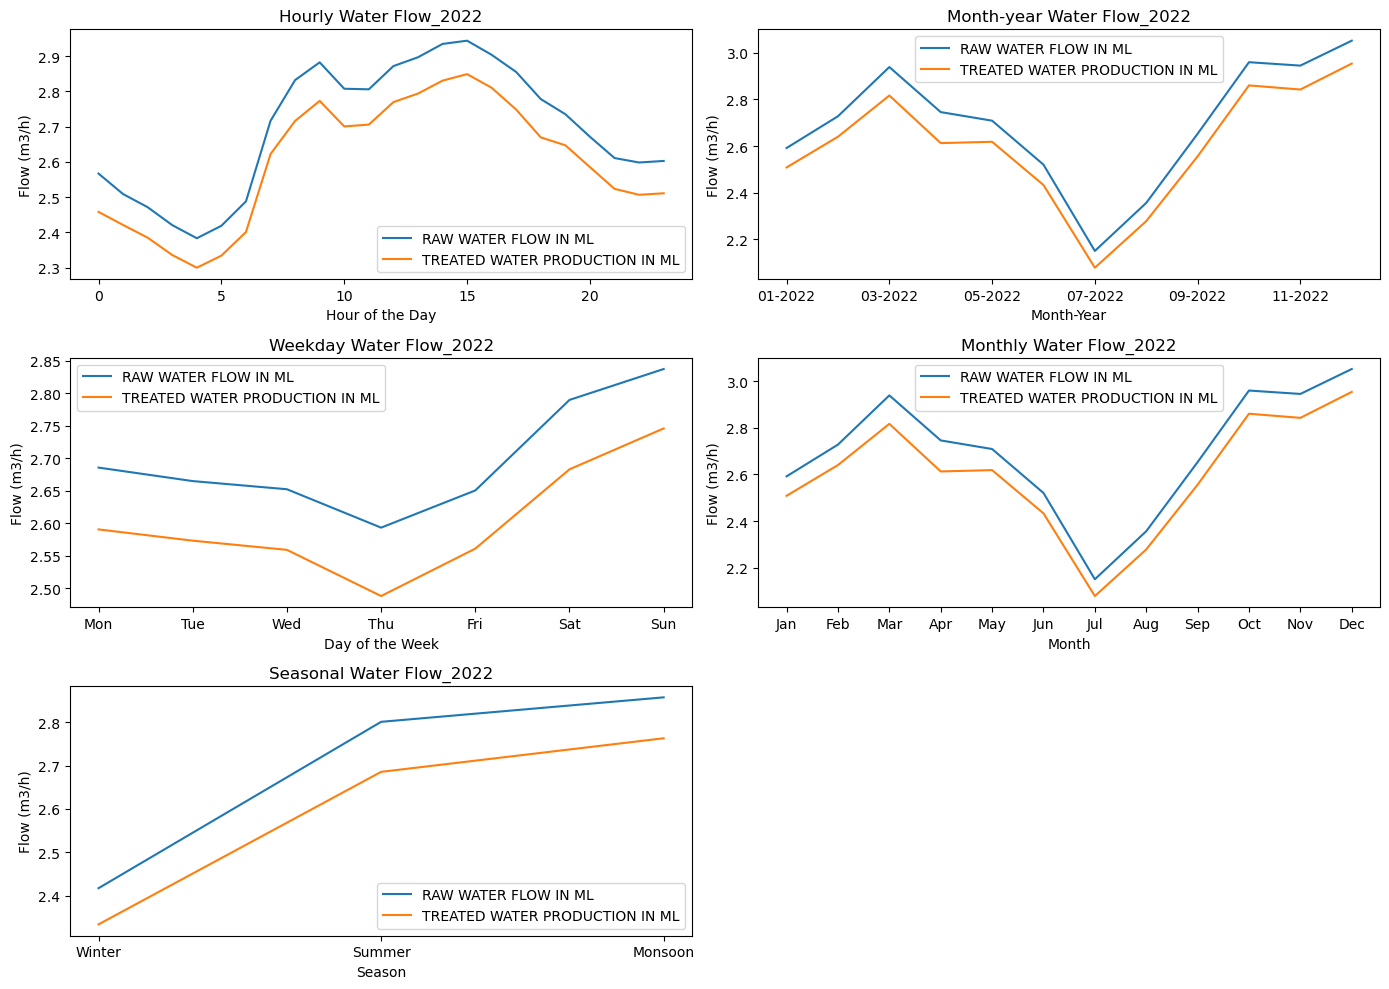

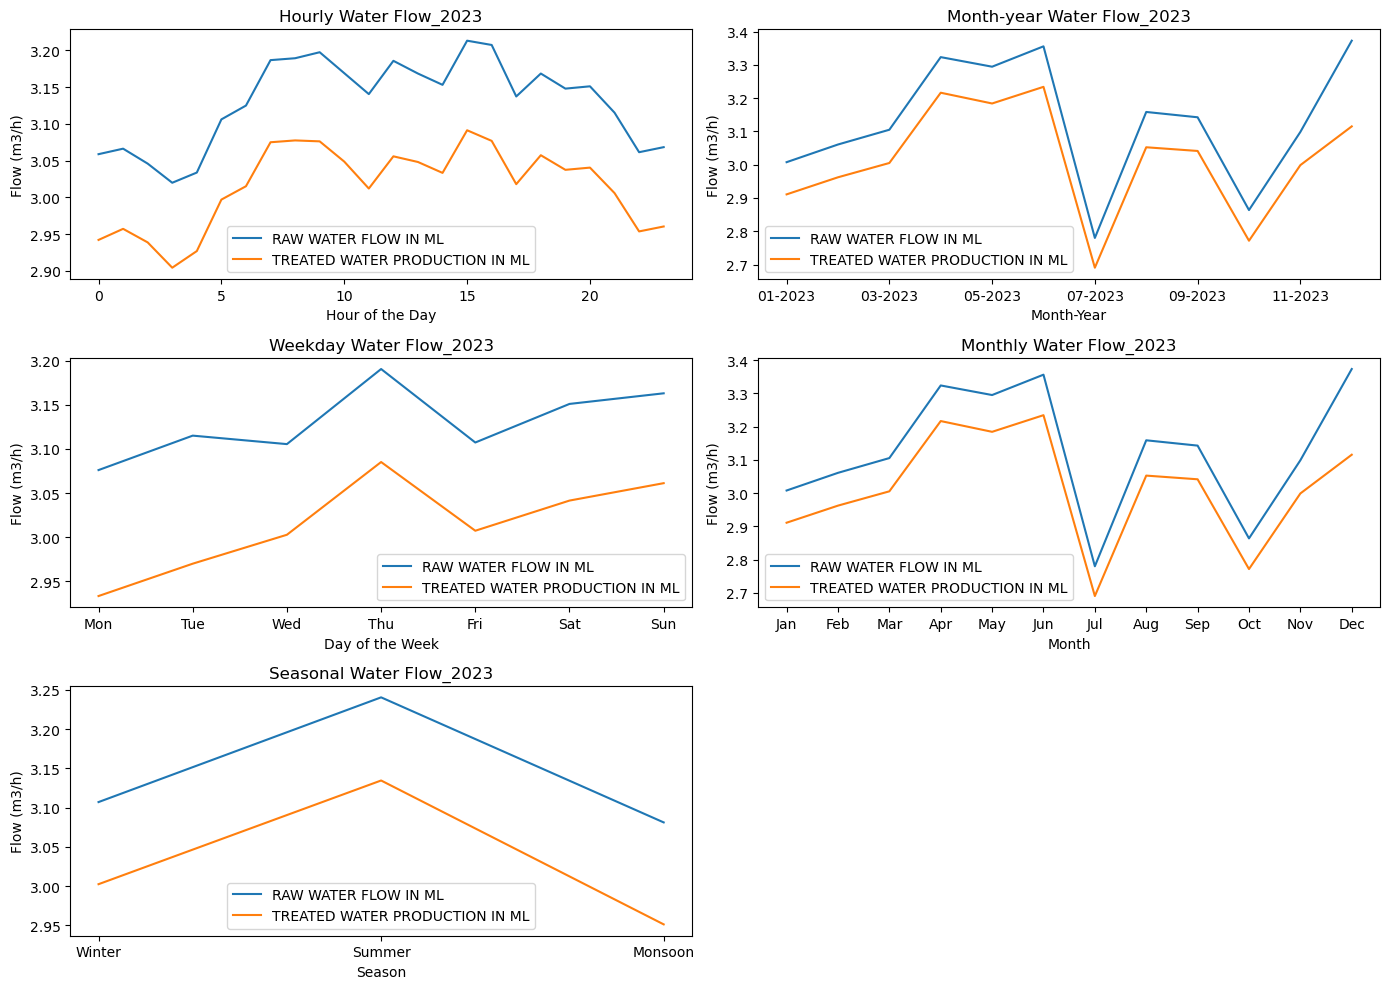

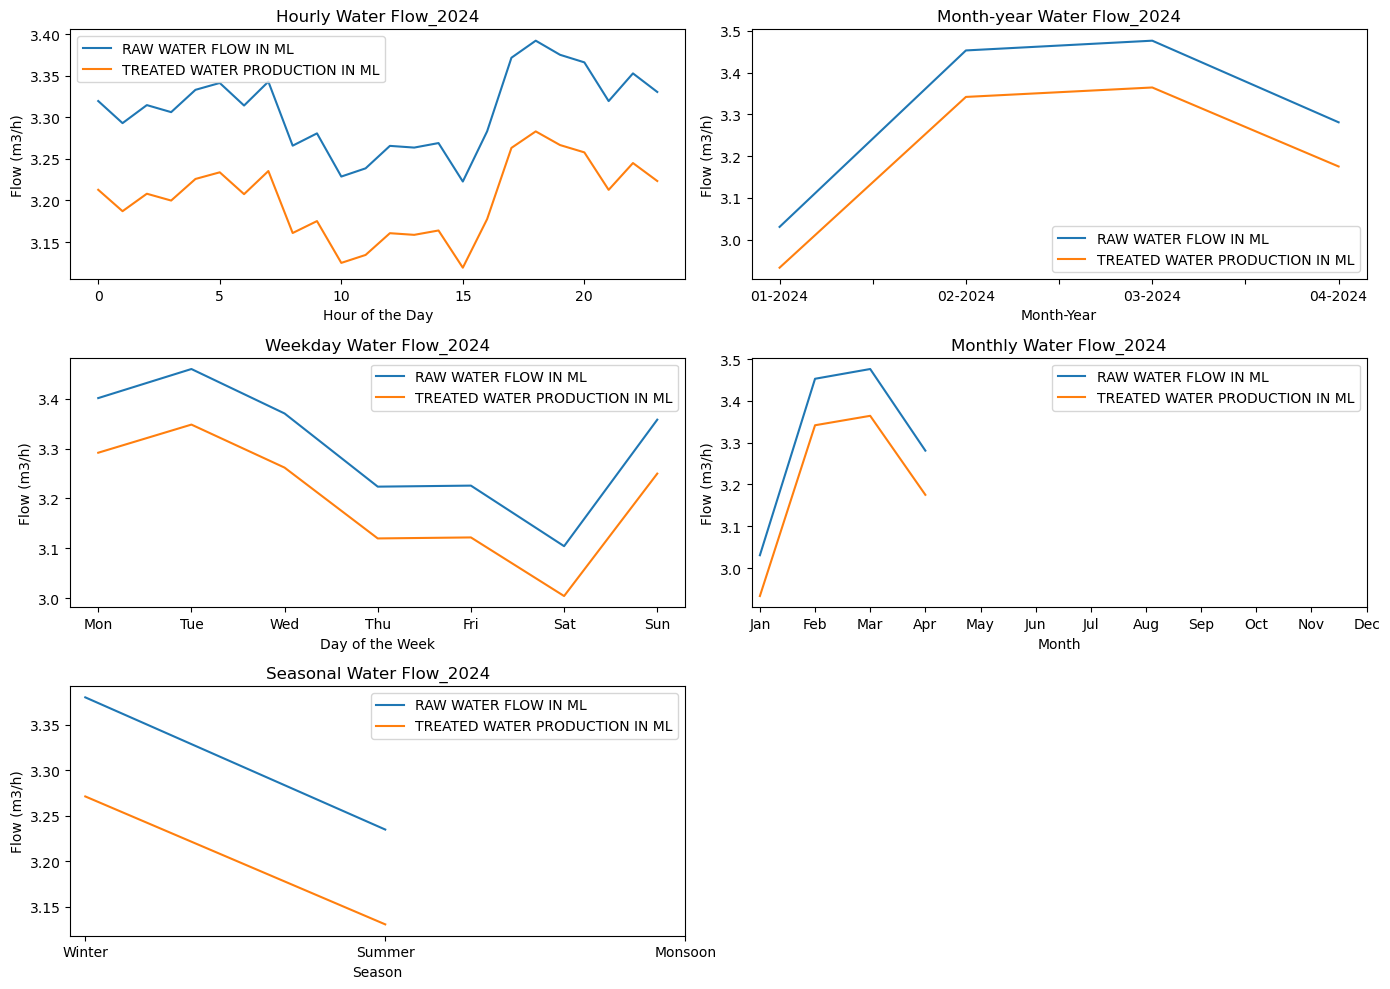

In [536]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


def process_and_visualize(df, year):
    # Filter dataframe for the specified year
    df_year = df[df['YEAR'] == year]
    
    # Convert 'DATETIME' to datetime
    df_year['DATETIME'] = pd.to_datetime(df_year['DATETIME'])
    df_year.reset_index(drop=True, inplace=True)
    
    # Extract time-based features
    df_year['Hour'] = df_year['DATETIME'].dt.hour
    df_year['Month-Year'] = df_year['DATETIME'].dt.strftime('%m-%Y')
    df_year['Weekday'] = df_year['DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
    df_year['Month'] = df_year['DATETIME'].dt.month
    df_year['Year'] = df_year['DATETIME'].dt.year
    
    # Classify season
    def classify_season(month):
        if month in [10, 11, 12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Unknown'
    
    df_year['Season'] = df_year['Month'].apply(classify_season)
    
    # Aggregate data
    hourly_flow = df_year.groupby(['Hour'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()
    daily_flow = df_year.groupby(['Month-Year'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()
    weekday_flow = df_year.groupby(['Weekday'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()
    monthly_flow = df_year.groupby(['Month'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()
    seasonal_flow = df_year.groupby(['Season'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()
    
    # Visualize patterns
    plt.figure(figsize=(14, 10))
    
    # Hourly Patterns
    plt.subplot(3, 2, 1)
    hourly_flow.plot(ax=plt.gca())
    plt.title(f'Hourly Water Flow_{year}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Flow (m3/h)')
    
    # Daily Patterns
    plt.subplot(3, 2, 2)
    daily_flow.plot(ax=plt.gca())
    plt.title(f'Month-year Water Flow_{year}')
    plt.xlabel('Month-Year')
    plt.ylabel('Flow (m3/h)')
    
    # Weekday Patterns
    plt.subplot(3, 2, 3)
    weekday_flow.plot(ax=plt.gca())
    plt.title(f'Weekday Water Flow_{year}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Flow (m3/h)')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
    # Monthly Patterns
    plt.subplot(3, 2, 4)
    monthly_flow.plot(ax=plt.gca())
    plt.title(f'Monthly Water Flow_{year}')
    plt.xlabel('Month')
    plt.ylabel('Flow (m3/h)')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    # Seasonal Patterns
    plt.subplot(3, 2, 5)
    seasonal_flow.plot(ax=plt.gca())
    plt.title(f'Seasonal Water Flow_{year}')
    plt.xlabel('Season')
    plt.ylabel('Flow (m3/h)')
    plt.xticks(ticks=range(3), labels=['Winter', 'Summer', 'Monsoon'])
    
    plt.tight_layout()
    plt.show()

# Example usage for multiple years
for year in [2021, 2022, 2023, 2024]:
    process_and_visualize(df, year)


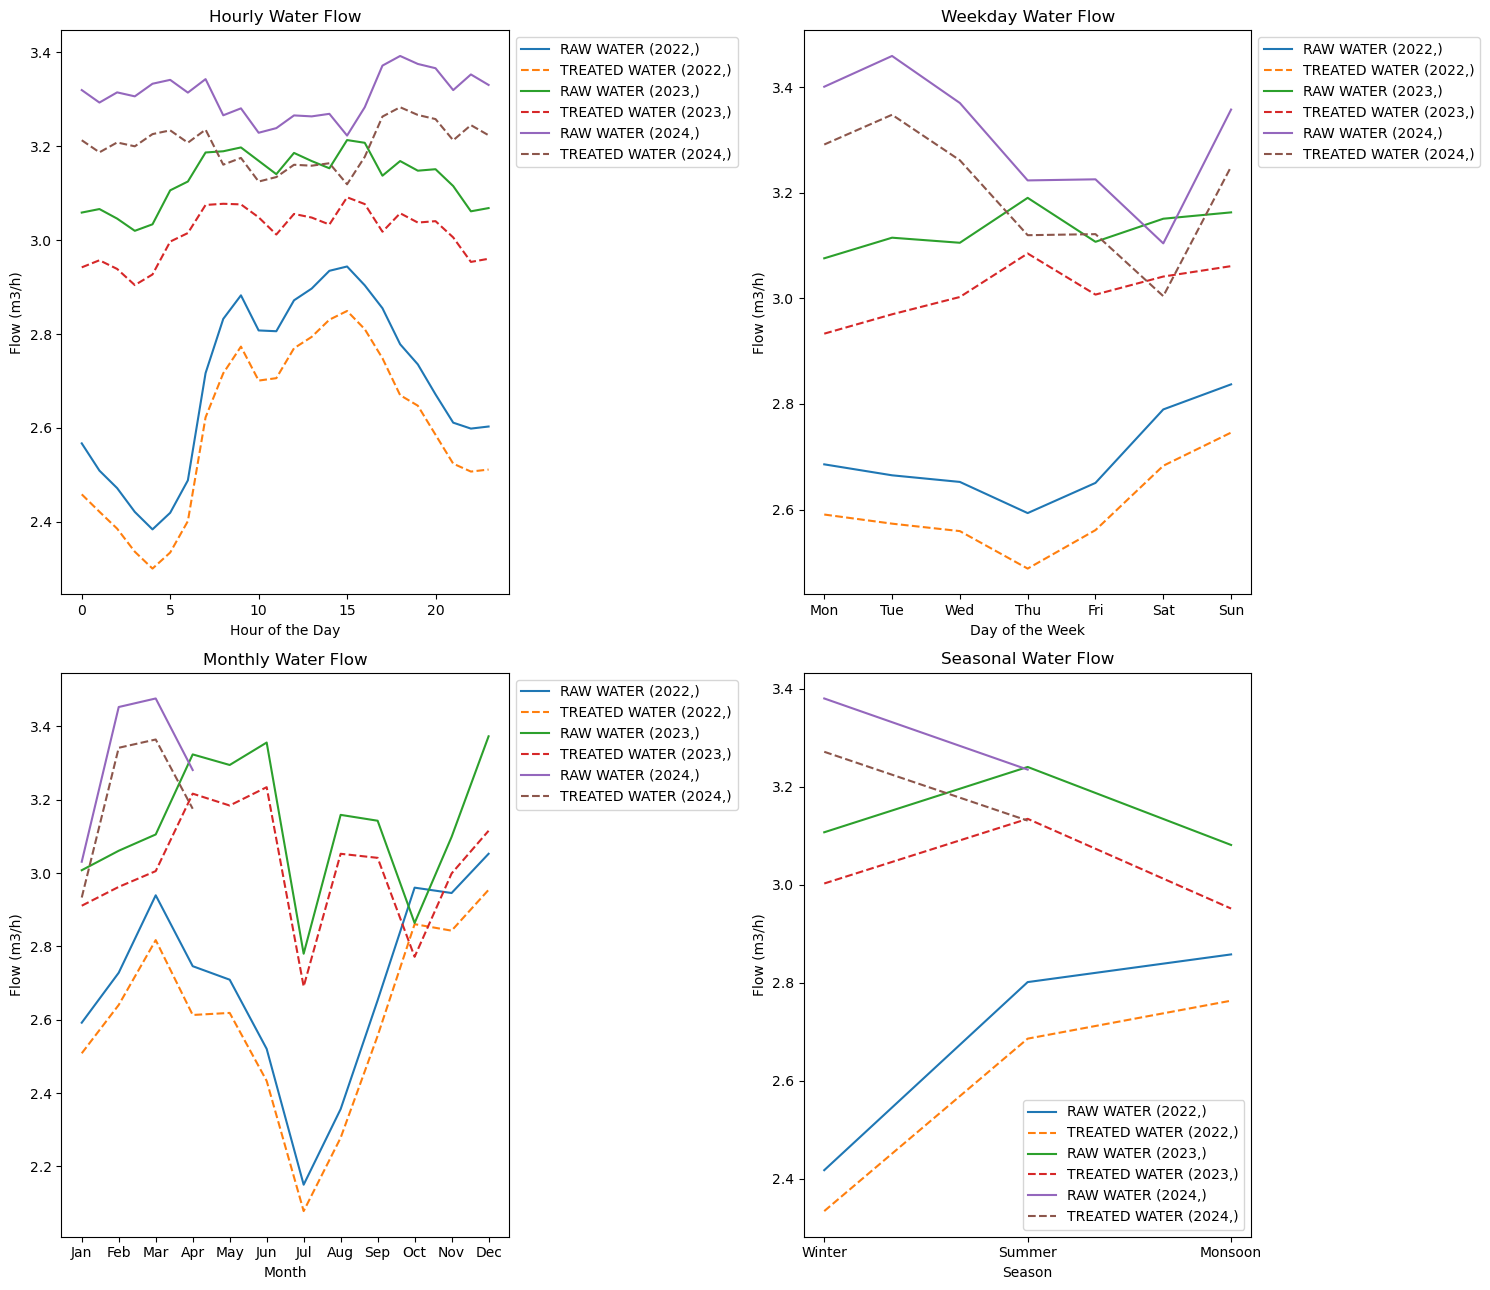

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def process_and_aggregate(df, year):
    # Filter dataframe for the specified year
    df_year = df[df['YEAR'] == year]
    
    # Convert 'DATETIME' to datetime
    df_year['DATETIME'] = pd.to_datetime(df_year['DATETIME'])
    df_year.reset_index(drop=True, inplace=True)
    
    # Extract time-based features
    df_year['Hour'] = df_year['DATETIME'].dt.hour
    df_year['Month-Year'] = df_year['DATETIME'].dt.strftime('%m-%Y')
    df_year['Weekday'] = df_year['DATETIME'].dt.dayofweek  # Monday=0, Sunday=6
    df_year['Month'] = df_year['DATETIME'].dt.month
    df_year['Year'] = df_year['DATETIME'].dt.year
    
    # Classify season
    def classify_season(month):
        if month in [10, 11, 12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Unknown'
    
    df_year['Season'] = df_year['Month'].apply(classify_season)
    
    # Aggregate data
    hourly_flow = df_year.groupby(['Hour'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean().reset_index()
    hourly_flow['Year'] = year
    
    daily_flow = df_year.groupby(['Month-Year'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean().reset_index()
    daily_flow['Year'] = year
    
    weekday_flow = df_year.groupby(['Weekday'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean().reset_index()
    weekday_flow['Year'] = year
    
    monthly_flow = df_year.groupby(['Month'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean().reset_index()
    monthly_flow['Year'] = year
    
    seasonal_flow = df_year.groupby(['Season'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean().reset_index()
    seasonal_flow['Year'] = year
    
    return hourly_flow, daily_flow, weekday_flow, monthly_flow, seasonal_flow

# Aggregate data for all years
all_hourly_flow = []
all_daily_flow = []
all_weekday_flow = []
all_monthly_flow = []
all_seasonal_flow = []

for year in [2022, 2023, 2024]:
    hourly_flow, daily_flow, weekday_flow, monthly_flow, seasonal_flow = process_and_aggregate(df, year)
    all_hourly_flow.append(hourly_flow)
    all_daily_flow.append(daily_flow)
    all_weekday_flow.append(weekday_flow)
    all_monthly_flow.append(monthly_flow)
    all_seasonal_flow.append(seasonal_flow)

# Combine dataframes for plotting
combined_hourly_flow = pd.concat(all_hourly_flow)
combined_daily_flow = pd.concat(all_daily_flow)
combined_weekday_flow = pd.concat(all_weekday_flow)
combined_monthly_flow = pd.concat(all_monthly_flow)
combined_seasonal_flow = pd.concat(all_seasonal_flow)

# Plot combined graphs
plt.figure(figsize=(15, 13))

# Hourly Patterns
plt.subplot(2, 2, 1)
for key, grp in combined_hourly_flow.groupby(['Year']):
    grp.plot(ax=plt.gca(), kind='line', x='Hour', y='RAW WATER FLOW IN ML', label=f'RAW WATER {key}')
    grp.plot(ax=plt.gca(), kind='line', x='Hour', y='TREATED WATER PRODUCTION IN ML', linestyle='--', label=f'TREATED WATER {key}')
plt.title('Hourly Water Flow')
plt.xlabel('Hour of the Day')
plt.ylabel('Flow (m3/h)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Weekday Patterns
plt.subplot(2, 2, 2)
for key, grp in combined_weekday_flow.groupby(['Year']):
    grp.plot(ax=plt.gca(), kind='line', x='Weekday', y='RAW WATER FLOW IN ML', label=f'RAW WATER {key}')
    grp.plot(ax=plt.gca(), kind='line', x='Weekday', y='TREATED WATER PRODUCTION IN ML', linestyle='--', label=f'TREATED WATER {key}')
plt.title('Weekday Water Flow')
plt.xlabel('Day of the Week')
plt.ylabel('Flow (m3/h)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Monthly Patterns
plt.subplot(2, 2, 3)
for key, grp in combined_monthly_flow.groupby(['Year']):
    grp.plot(ax=plt.gca(), kind='line', x='Month', y='RAW WATER FLOW IN ML', label=f'RAW WATER {key}')
    grp.plot(ax=plt.gca(), kind='line', x='Month', y='TREATED WATER PRODUCTION IN ML', linestyle='--', label=f'TREATED WATER {key}')
plt.title('Monthly Water Flow')
plt.xlabel('Month')
plt.ylabel('Flow (m3/h)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Seasonal Patterns
plt.subplot(2, 2, 4)
for key, grp in combined_seasonal_flow.groupby(['Year']):
    grp.plot(ax=plt.gca(), kind='line', x='Season', y='RAW WATER FLOW IN ML', label=f'RAW WATER {key}')
    grp.plot(ax=plt.gca(), kind='line', x='Season', y='TREATED WATER PRODUCTION IN ML', linestyle='--', label=f'TREATED WATER {key}')
plt.title('Seasonal Water Flow')
plt.xlabel('Season')
plt.ylabel('Flow (m3/h)')
plt.xticks(ticks=range(3), labels=['Winter', 'Summer', 'Monsoon'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.legend(loc='best')
plt.show()


# Correlation Analysis:

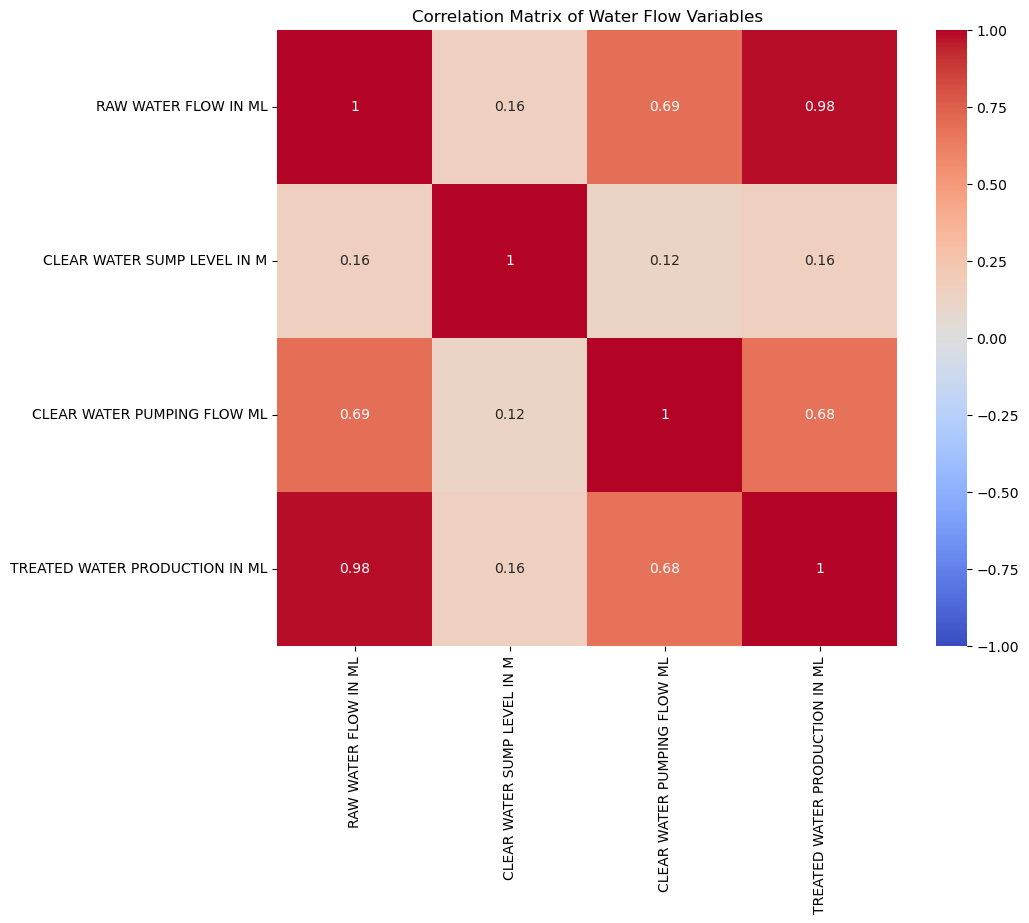

In [538]:

df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Select relevant columns for correlation analysis
columns_of_interest = [
    'RAW WATER FLOW IN ML',
    'CLEAR WATER SUMP LEVEL IN M',
    'CLEAR WATER PUMPING FLOW ML',
    'TREATED WATER PRODUCTION IN ML'
]

# Compute the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Water Flow Variables')
plt.show()


# Proportion of Raw Water vs. Water Lost every year - Pie chart

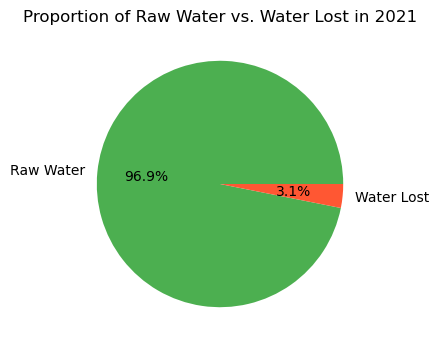

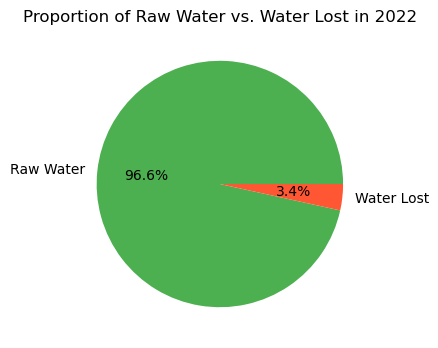

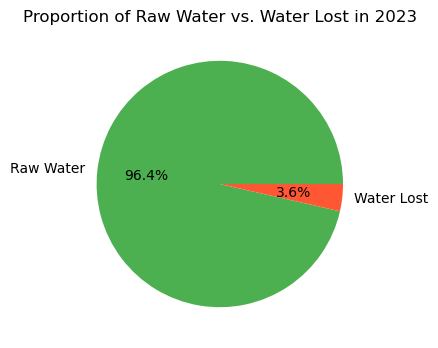

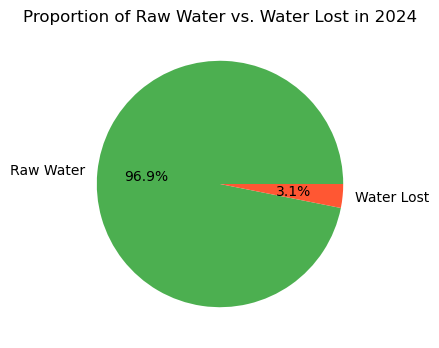

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Ensure your DataFrame has a datetime column named 'DATE'
# df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year from the datetime column
df['Year'] = df['DATE'].dt.year

# Select only the relevant numeric columns
numeric_cols = ['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']

# Group by year and sum the numeric columns
yearly_data = df.groupby('Year')[numeric_cols].sum()

# Calculate yearly totals
yearly_data['Total Water Lost'] = yearly_data['RAW WATER FLOW IN ML'] - yearly_data['TREATED WATER PRODUCTION IN ML']

# Plotting pie charts year-wise
for year in yearly_data.index:
    total_raw_water = yearly_data.loc[year, 'RAW WATER FLOW IN ML']
    total_water_lost = yearly_data.loc[year, 'Total Water Lost']
    
    plt.figure(figsize=(4, 4))
    plt.pie([total_raw_water, total_water_lost], labels=['Raw Water', 'Water Lost'], autopct='%1.1f%%', colors=['#4CAF50', '#FF5733'])
    plt.title(f'Proportion of Raw Water vs. Water Lost in {year}')
    plt.show()


# Proportion of Raw Water vs. Water Lost every year - Bar graph

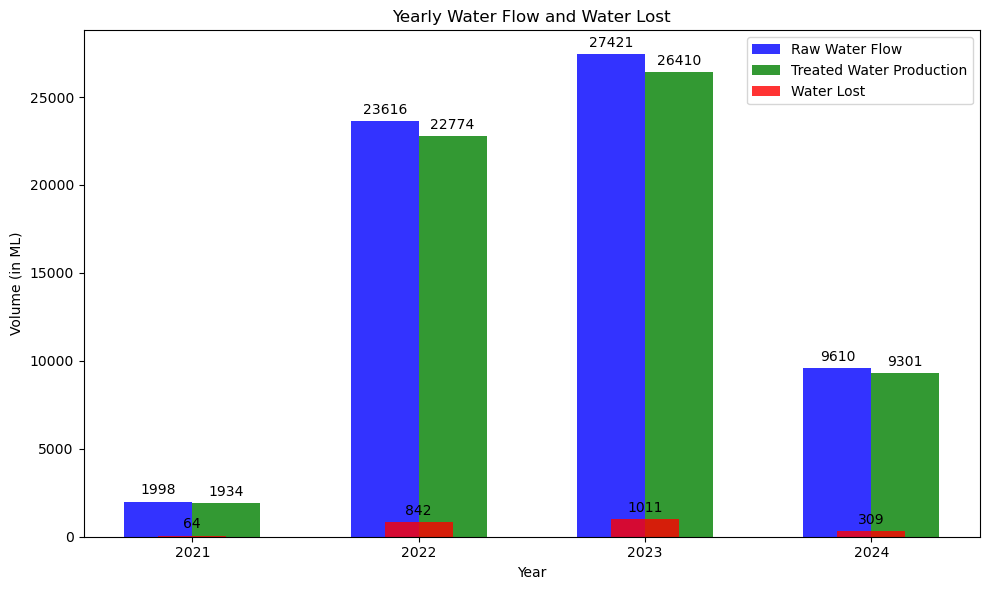

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Ensure your DataFrame has a datetime column named 'DATE'
# df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year from the datetime column
df['Year'] = df['DATE'].dt.year

# Select only the relevant numeric columns
numeric_cols = ['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']

# Group by year and sum the numeric columns
yearly_data = df.groupby('Year')[numeric_cols].sum()

# Calculate yearly totals
yearly_data['Total Water Lost'] = yearly_data['RAW WATER FLOW IN ML'] - yearly_data['TREATED WATER PRODUCTION IN ML']

# Plotting bar graph
years = yearly_data.index
bar_width = 0.3
opacity = 0.8

plt.figure(figsize=(10, 6))

# Bar for raw water flow
bars1 = plt.bar(years - bar_width/2, yearly_data['RAW WATER FLOW IN ML'], bar_width,
                alpha=opacity, color='b', label='Raw Water Flow')

# Bar for treated water production
bars2 = plt.bar(years + bar_width/2, yearly_data['TREATED WATER PRODUCTION IN ML'], bar_width,
                alpha=opacity, color='g', label='Treated Water Production')

# Bar for water lost
bars3 = plt.bar(years, yearly_data['Total Water Lost'], bar_width,
                alpha=opacity, color='r', label='Water Lost')

# Adding text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.xlabel('Year')
plt.ylabel('Volume (in ML)')
plt.title('Yearly Water Flow and Water Lost')
plt.xticks(years)
plt.legend()

plt.tight_layout()
plt.show()


# Proportion of Raw Water vs. Water Lost every year - Line graph

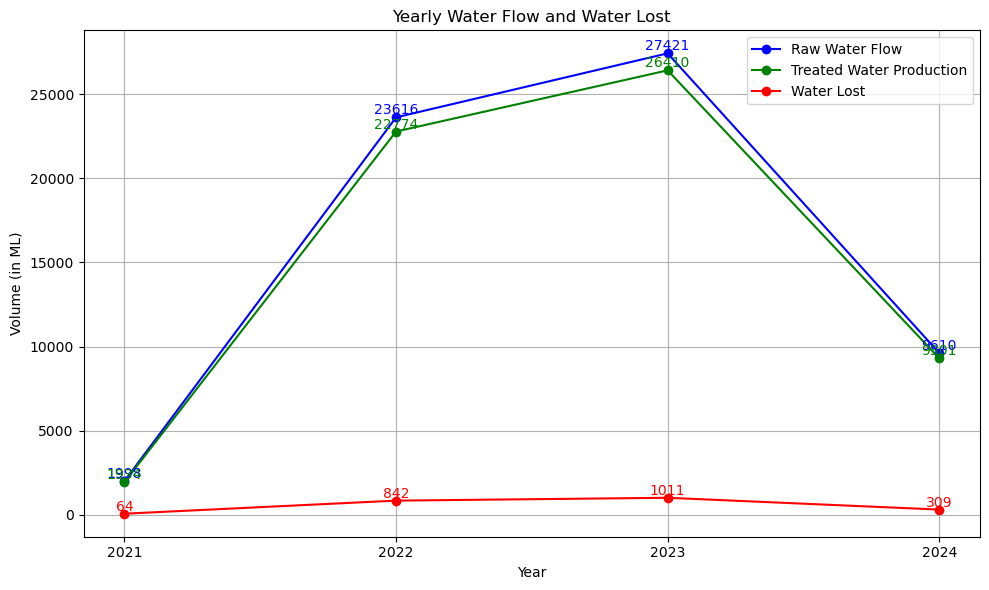

In [10]:
df['Year'] = df['DATE'].dt.year

# Select only the relevant numeric columns
numeric_cols = ['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']

# Group by year and sum the numeric columns
yearly_data = df.groupby('Year')[numeric_cols].sum()

# Calculate yearly totals
yearly_data['Total Water Lost'] = yearly_data['RAW WATER FLOW IN ML'] - yearly_data['TREATED WATER PRODUCTION IN ML']

# Plotting line graph
years = yearly_data.index

plt.figure(figsize=(10, 6))

# Line for raw water flow
plt.plot(years, yearly_data['RAW WATER FLOW IN ML'], marker='o', color='b', label='Raw Water Flow')

# Line for treated water production
plt.plot(years, yearly_data['TREATED WATER PRODUCTION IN ML'], marker='o', color='g', label='Treated Water Production')

# Line for water lost
plt.plot(years, yearly_data['Total Water Lost'], marker='o', color='r', label='Water Lost')

# Adding data labels
def add_labels():
    for year, raw_flow, treated_production, water_lost in zip(years, yearly_data['RAW WATER FLOW IN ML'], yearly_data['TREATED WATER PRODUCTION IN ML'], yearly_data['Total Water Lost']):
        plt.text(year, raw_flow, f'{raw_flow:.0f}', ha='center', va='bottom', fontsize=10, color='blue')
        plt.text(year, treated_production, f'{treated_production:.0f}', ha='center', va='bottom', fontsize=10, color='green')
        plt.text(year, water_lost, f'{water_lost:.0f}', ha='center', va='bottom', fontsize=10, color='red')

add_labels()

plt.xlabel('Year')
plt.ylabel('Volume (in ML)')
plt.title('Yearly Water Flow and Water Lost')
plt.xticks(years)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Frequency of Remark Categories

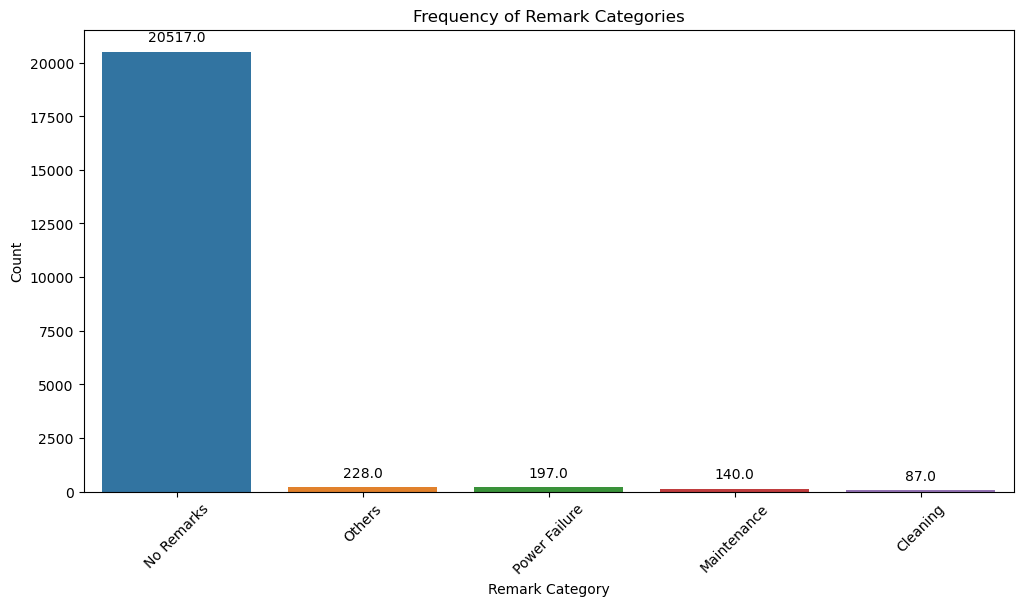

In [540]:

# Create the figure and axis
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Remark Category')

# Set title and labels
ax.set_title('Frequency of Remark Categories')
ax.set_xlabel('Remark Category')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Annotate the bars with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


In [562]:
df_year=df[(df['Remark Category']=='Power Failure') & (df['YEAR']==2023)]
df_year

,DATE,TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN M,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,YEAR,MONTH,MONTH-YEAR,HOUR,Remark Category,DATETIME
9921,2023-01-18,09:00:00,0.00000,0.00341,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,9,Power Failure,2023-01-18 09:00:00
9922,2023-01-18,10:00:00,0.00000,0.00331,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,10,Power Failure,2023-01-18 10:00:00
9923,2023-01-18,11:00:00,0.00000,0.00282,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,11,Power Failure,2023-01-18 11:00:00
9924,2023-01-18,12:00:00,0.00000,0.00269,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,12,Power Failure,2023-01-18 12:00:00
9925,2023-01-18,13:00:00,0.00000,0.00251,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,13,Power Failure,2023-01-18 13:00:00
9926,2023-01-18,14:00:00,0.00000,0.00246,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,14,Power Failure,2023-01-18 14:00:00
9927,2023-01-18,15:00:00,0.00000,0.00239,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,15,Power Failure,2023-01-18 15:00:00
10449,2023-02-09,09:00:00,3.53262,0.00293,2.78792,3.41887,power failed @9.45 to 2.25,2023,2,02-2023,9,Power Failure,2023-02-09 09:00:00
10450,2023-02-09,10:00:00,0.00000,0.00331,0.00000,0.00000,power failed @9.45 to 2.26,2023,2,02-2023,10,Power Failure,2023-02-09 10:00:00
10451,2023-02-09,11:00:00,0.00000,0.00298,0.00000,0.00000,power failed @9.45 to 2.27,2023,2,02-2023,11,Power Failure,2023-02-09 11:00:00


In [563]:
df_year['Hour Difference'] = df_year.groupby('Remark Category')['HOUR'].diff().fillna(0)
df_year['Hour Difference'] = df_year['Hour Difference'].clip(lower=0)  
df_year

,DATE,TIME,RAW WATER FLOW IN ML,CLEAR WATER SUMP LEVEL IN M,CLEAR WATER PUMPING FLOW ML,TREATED WATER PRODUCTION IN ML,REMARKS,YEAR,MONTH,MONTH-YEAR,HOUR,Remark Category,DATETIME,Hour Difference
9921,2023-01-18,09:00:00,0.00000,0.00341,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,9,Power Failure,2023-01-18 09:00:00,0.0
9922,2023-01-18,10:00:00,0.00000,0.00331,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,10,Power Failure,2023-01-18 10:00:00,1.0
9923,2023-01-18,11:00:00,0.00000,0.00282,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,11,Power Failure,2023-01-18 11:00:00,1.0
9924,2023-01-18,12:00:00,0.00000,0.00269,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,12,Power Failure,2023-01-18 12:00:00,1.0
9925,2023-01-18,13:00:00,0.00000,0.00251,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,13,Power Failure,2023-01-18 13:00:00,1.0
9926,2023-01-18,14:00:00,0.00000,0.00246,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,14,Power Failure,2023-01-18 14:00:00,1.0
9927,2023-01-18,15:00:00,0.00000,0.00239,0.00000,0.00000,Pumping Stoped Due to permitted Power failure ...,2023,1,01-2023,15,Power Failure,2023-01-18 15:00:00,1.0
10449,2023-02-09,09:00:00,3.53262,0.00293,2.78792,3.41887,power failed @9.45 to 2.25,2023,2,02-2023,9,Power Failure,2023-02-09 09:00:00,0.0
10450,2023-02-09,10:00:00,0.00000,0.00331,0.00000,0.00000,power failed @9.45 to 2.26,2023,2,02-2023,10,Power Failure,2023-02-09 10:00:00,1.0
10451,2023-02-09,11:00:00,0.00000,0.00298,0.00000,0.00000,power failed @9.45 to 2.27,2023,2,02-2023,11,Power Failure,2023-02-09 11:00:00,1.0


# Total Sum of Hour Differences by Remark Category and Year

Total sum of all hour differences:
   Remark Category  Year  Hour Difference
0         Cleaning  2022             62.0
1         Cleaning  2023             24.0
2      Maintenance  2022             31.0
3      Maintenance  2023             50.0
4      Maintenance  2024             51.0
5       No Remarks  2021            712.0
6       No Remarks  2022           8230.0
7       No Remarks  2023           8327.0
8       No Remarks  2024           2722.0
9           Others  2022            181.0
10          Others  2023             31.0
11          Others  2024             24.0
12   Power Failure  2022            168.0
13   Power Failure  2023             77.0
14   Power Failure  2024              9.0


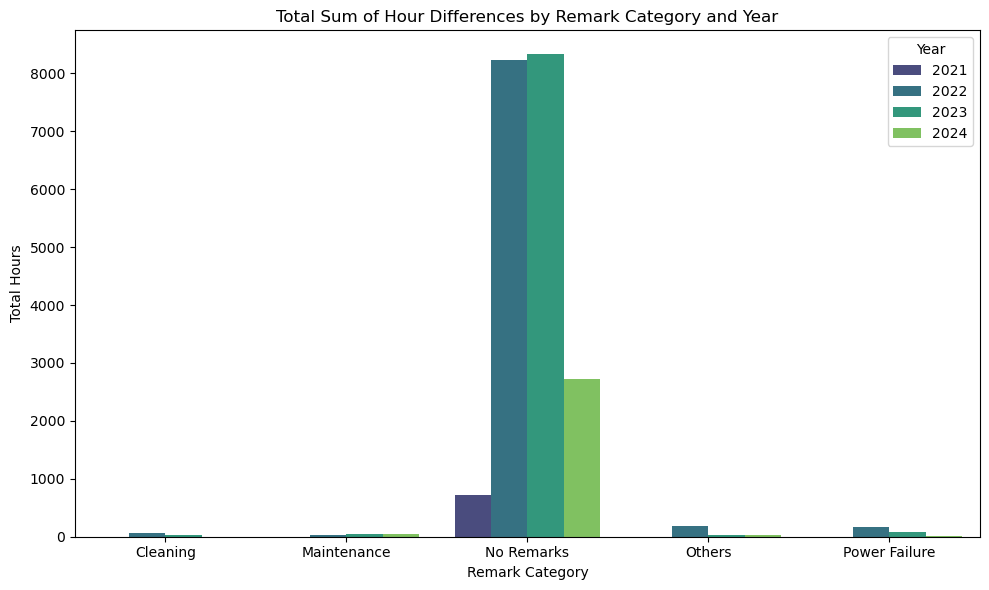

In [543]:
# Ensure the dataframes for each year are correctly created and combined
df_2021 = df[df['YEAR'] == 2021].copy()
df_2021['Year'] = 2021
df_2022 = df[df['YEAR'] == 2022].copy()
df_2022['Year'] = 2022
df_2023 = df[df['YEAR'] == 2023].copy()
df_2023['Year'] = 2023
df_2024 = df[df['YEAR'] == 2024].copy()
df_2024['Year'] = 2024

# List of dataframes for iteration
dfs = [df_2021, df_2022, df_2023, df_2024]

# Calculate the difference between consecutive values in the 'Hour' column for each 'Remark Category' and year
for df_year in dfs:
    df_year['Hour Difference'] = df_year.groupby('Remark Category')['HOUR'].diff().fillna(0)
    df_year['Hour Difference'] = df_year['Hour Difference'].clip(lower=0)  
# Combine data for all years into a single dataframe
df_combined = pd.concat(dfs).dropna(subset=['Hour Difference'])

# Calculate the sum of all hour differences by 'Remark Category' and 'Year'
total_hour_differences = df_combined.groupby(['Remark Category', 'Year'])['Hour Difference'].sum().reset_index()

print("Total sum of all hour differences:")
print(total_hour_differences)

# Plot the sum of hour differences by Remark Category and Year
plt.figure(figsize=(10, 6))
sns.barplot(data=total_hour_differences, x='Remark Category', y='Hour Difference', hue='Year', palette='viridis')
plt.title('Total Sum of Hour Differences by Remark Category and Year')
plt.ylabel('Total Hours')
plt.tight_layout()

# Show the plot
plt.show()

# Time Zone Water Flow

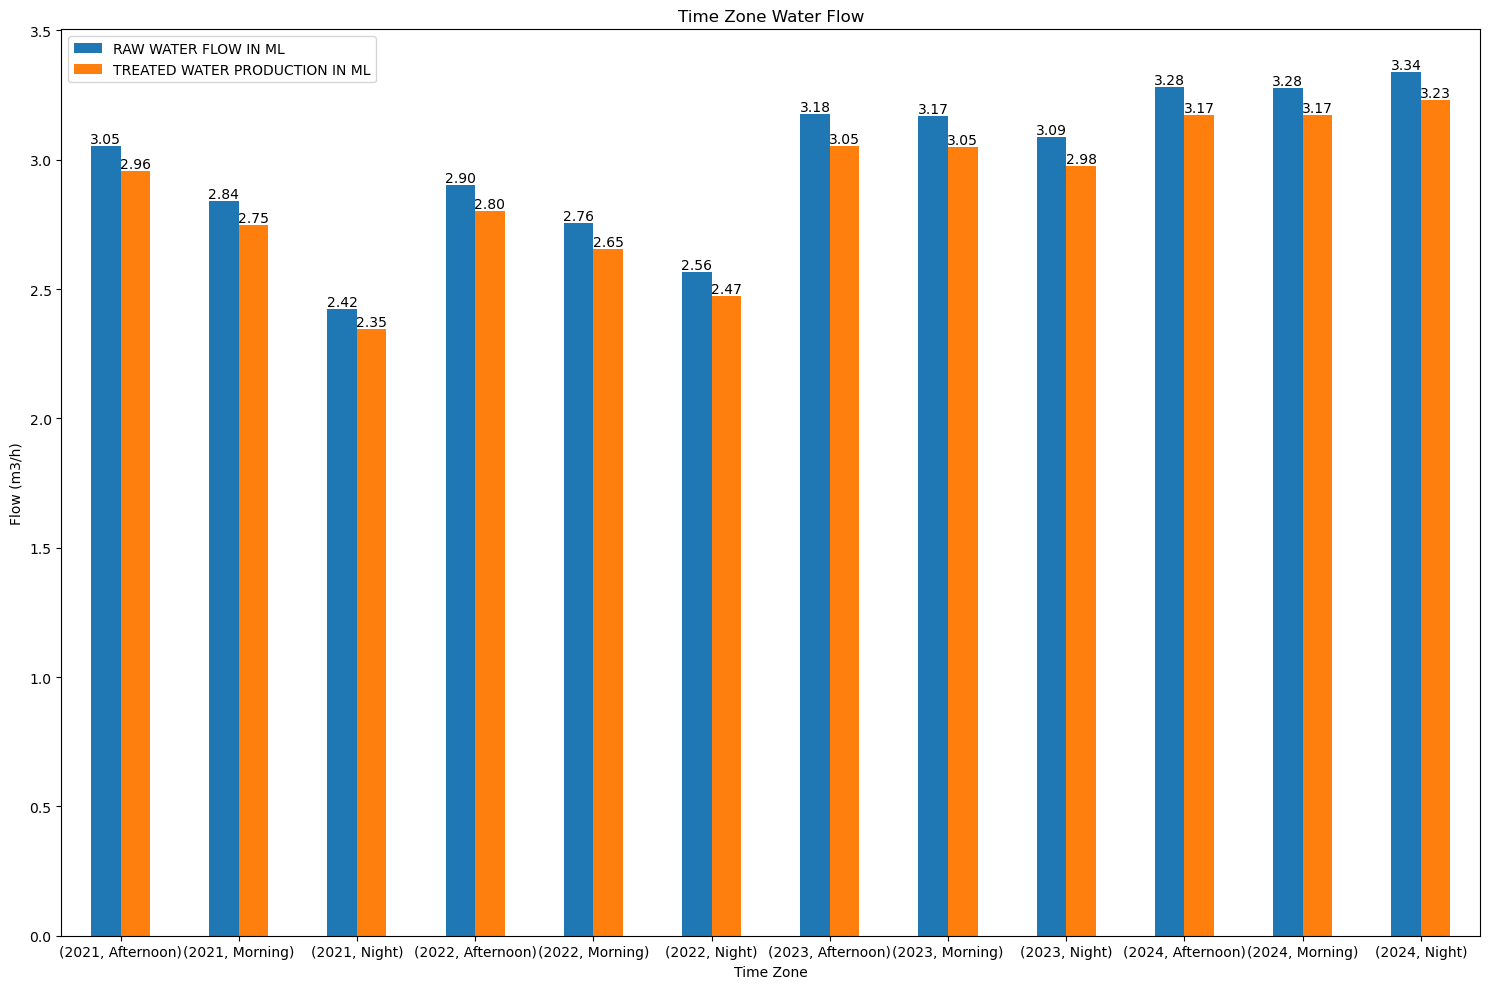

In [545]:
def classify_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the function to create the 'TimeZone' column
df['TimeZone'] = df['HOUR'].apply(classify_hour)

zone_flow = df.groupby(['Year','TimeZone'])[['RAW WATER FLOW IN ML', 'TREATED WATER PRODUCTION IN ML']].mean()

# Visualize patterns
plt.figure(figsize=(15, 10))

# TimeZone Patterns
ax = zone_flow.plot(kind='bar', ax=plt.gca())
plt.title('Time Zone Water Flow')
plt.xlabel('Time Zone')
plt.ylabel('Flow (m3/h)')
plt.xticks(rotation=0)

# Annotate bars with values
for p in ax.patches:
    value = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Yearly Water Flow by Time Zone(y axis value starting from 2)

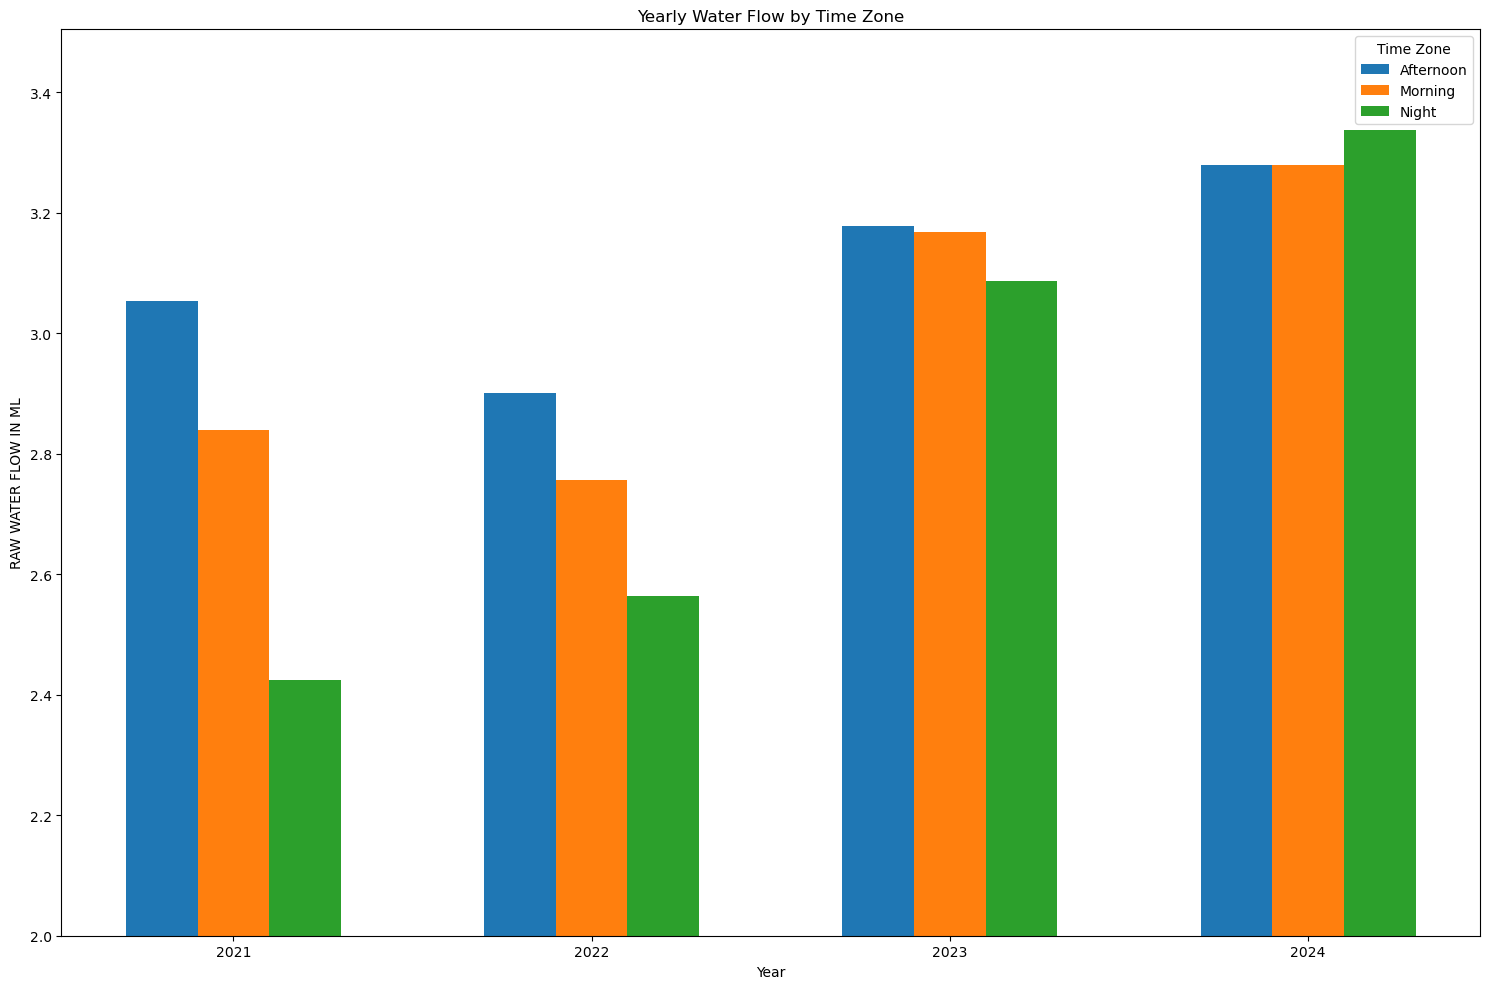

In [18]:
def classify_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Apply the function to create the 'TimeZone' column
df['TimeZone'] = df['HOUR'].apply(classify_hour)

# Group by Year and TimeZone, calculate mean
zone_flow = df.groupby(['Year', 'TimeZone'])[['RAW WATER FLOW IN ML']].mean().unstack()

# Plotting
plt.figure(figsize=(15, 10))

# Get years from the index
years = zone_flow.index.get_level_values('Year').unique()

# Number of time zones
num_zones = len(zone_flow.columns.levels[1])

# Width of each bar
bar_width = 0.2

# Plotting each time zone
for i, zone in enumerate(zone_flow.columns.levels[1]):
    plt.bar(years + i * bar_width, zone_flow['RAW WATER FLOW IN ML'][zone], width=bar_width, label=zone)

plt.xlabel('Year')
plt.ylabel('RAW WATER FLOW IN ML')
plt.title('Yearly Water Flow by Time Zone')
plt.xticks(years + bar_width * (num_zones - 1) / 2, years)  # Adjust xticks positions
plt.legend(title='Time Zone')

# Set y-axis limits
plt.ylim(2, None)  # Start from 2 and automatically determine the upper limit

plt.tight_layout()
plt.show()
